In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [6]:
adult_df = pd.read_csv('adult.csv', header=None)
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
                    'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
                    'income']
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
categoricals = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
                'native_country', 'income']
numericals = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [9]:
adult_df[categoricals].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


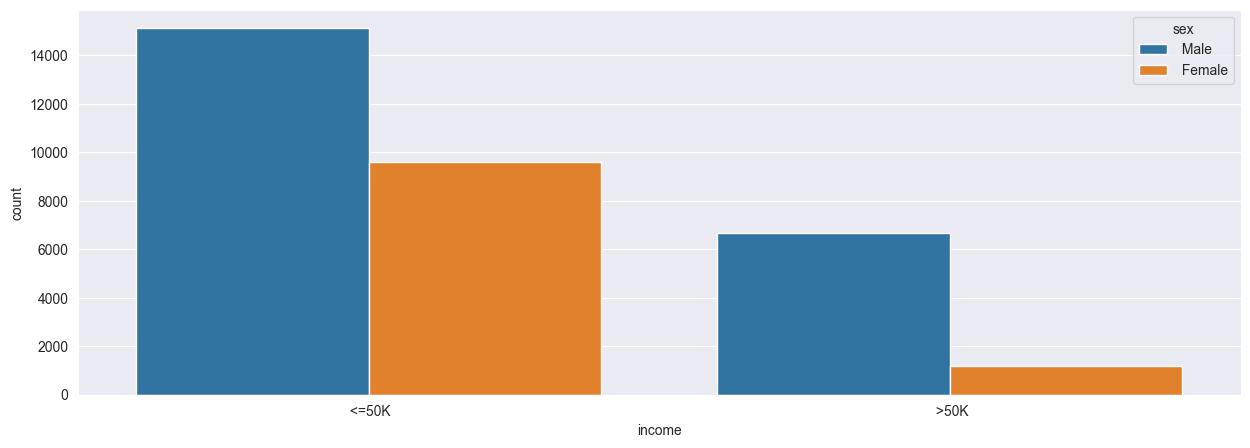

In [10]:
sns.countplot(x=adult_df['income'], hue='sex', data=adult_df)
plt.show()

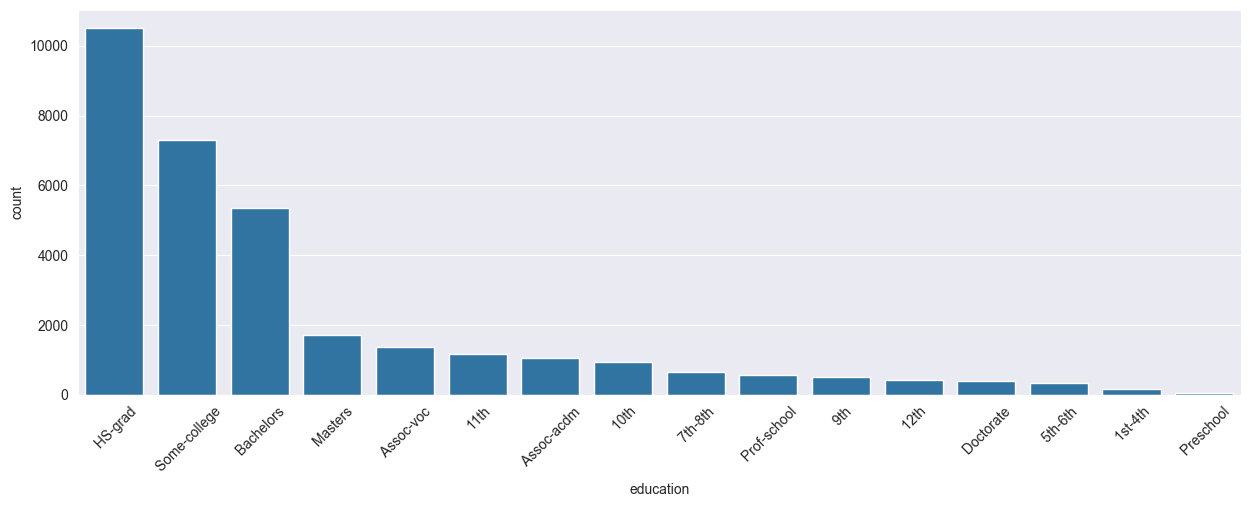

In [11]:
sns.countplot(x=adult_df['education'], order=adult_df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

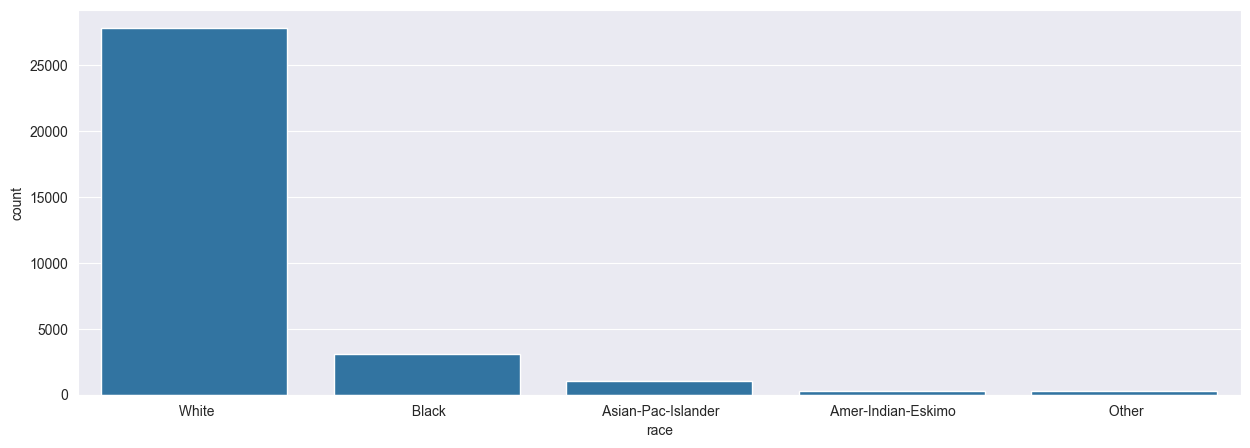

In [12]:
sns.countplot(x=adult_df['race'], data=adult_df)
plt.show()

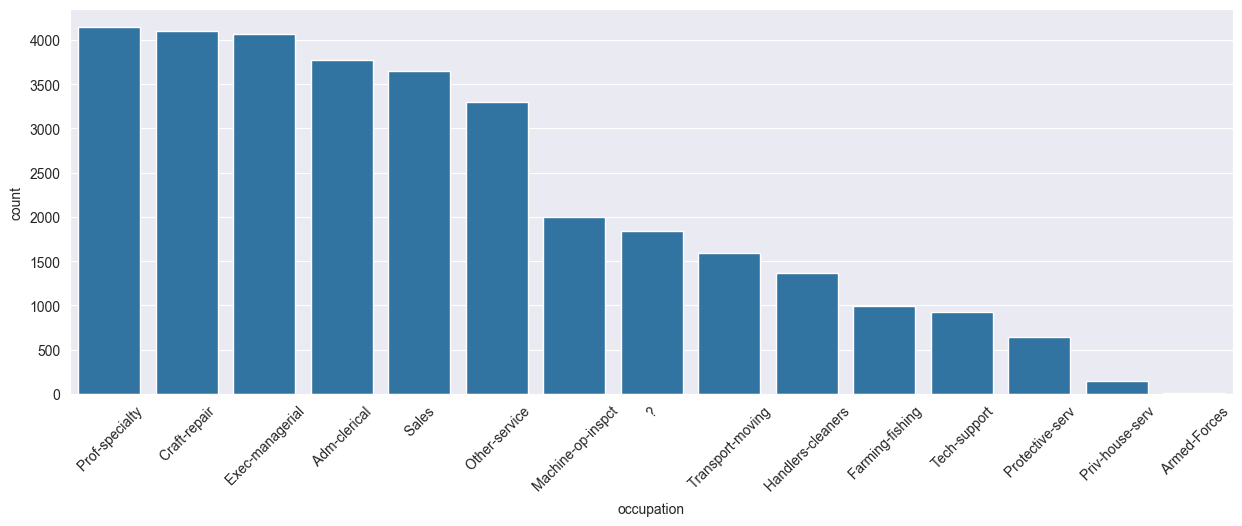

In [13]:
sns.countplot(x=adult_df['occupation'], data=adult_df, order=adult_df['occupation'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [14]:
adult_df['workclass'] = adult_df['workclass'].replace(' ?', np.NaN)
adult_df['occupation'] = adult_df['occupation'].replace(' ?', np.NaN)
adult_df['native_country'] = adult_df['native_country'].replace(' ?', np.NaN)

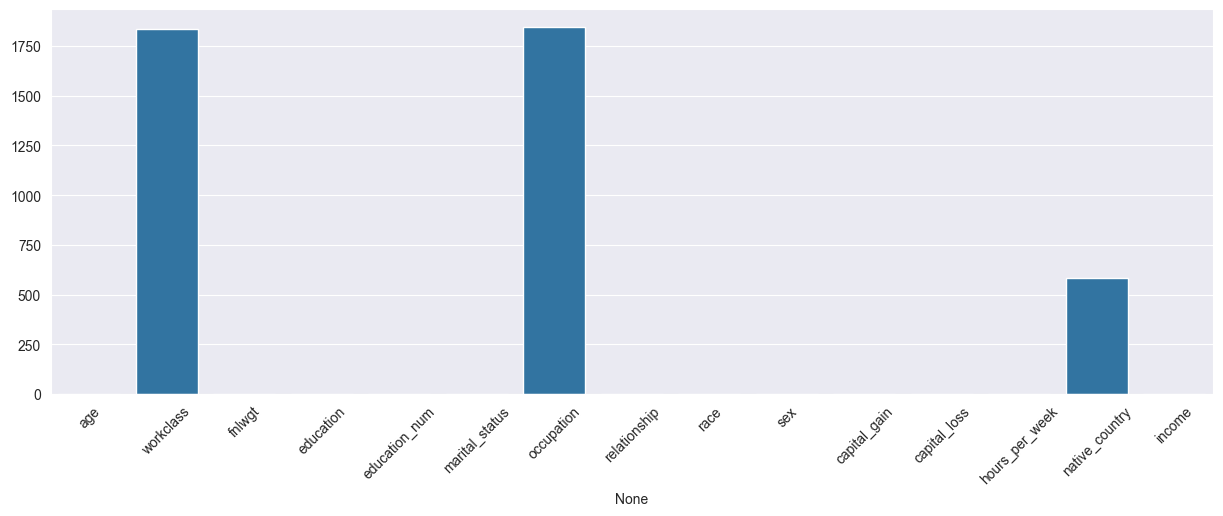

In [15]:
sns.barplot(x=adult_df.columns, y=adult_df.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

In [16]:
adult_df[numericals].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [17]:
for variable in numericals:
    if not adult_df[adult_df[variable] == ' ?'].empty:
        print(f'{variable} contains missing values ( ?)')

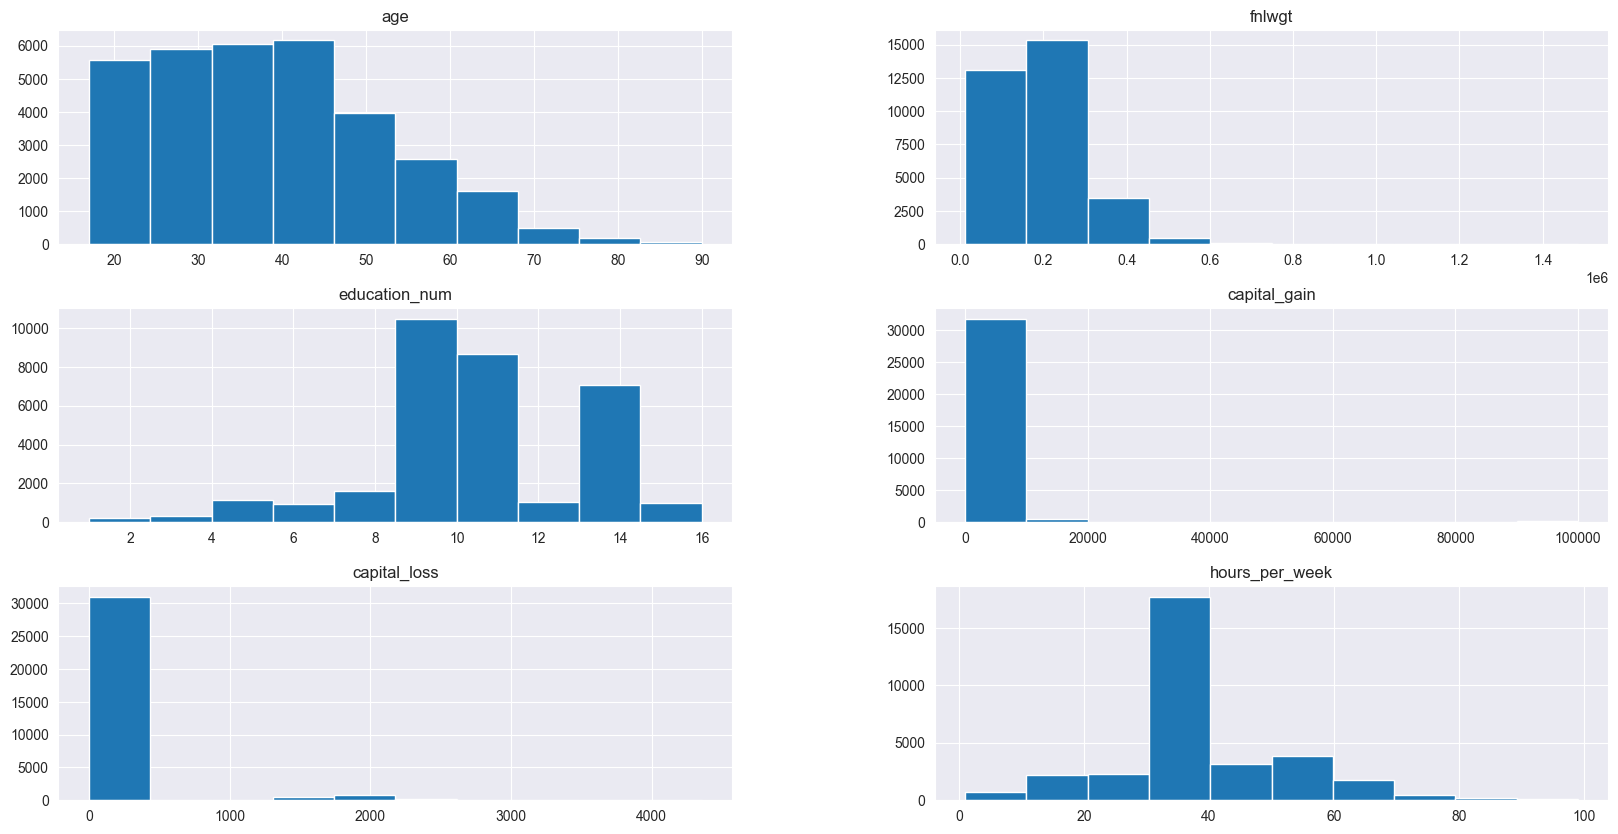

In [18]:
adult_df[numericals].hist(figsize=(20, 10))
plt.show()

In [19]:
adult_df['workclass'].fillna(adult_df['workclass'].mode()[0], inplace=True)
adult_df['occupation'].fillna(adult_df['occupation'].mode()[0], inplace=True)
adult_df['native_country'].fillna(adult_df['native_country'].mode()[0], inplace=True)

/var/folders/r3/pdzzngtx1nzc5n6m5_5nm9540000gn/T/ipykernel_96465/2968009018.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_df['workclass'].fillna(adult_df['workclass'].mode()[0], inplace=True)
/var/folders/r3/pdzzngtx1nzc5n6m5_5nm9540000gn/T/ipykernel_96465/2968009018.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

In [20]:
adult_df = pd.get_dummies(data=adult_df, columns=categoricals, drop_first=True)

In [21]:
adult_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
from sklearn.preprocessing import RobustScaler

x = adult_df.drop('income_ >50K', axis=1)
y = adult_df['income_ >50K']

scaler = RobustScaler()
x_scaled = scaler.fit_transform(X[numericals])

x[numericals] = x_scaled

In [25]:
x.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.10,-0.845803,1.000000,2174.0,0.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.65,-0.797197,1.000000,0.0,0.0,-5.4,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.05,0.312773,-0.333333,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,0.80,0.472766,-1.000000,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,-0.45,1.342456,1.000000,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [29]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

GaussianNB()

In [30]:
y_pred = gnb.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8260


In [32]:
y_pred_train = gnb.predict(X_train)
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.6116
Test set score: 0.6017


In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6341 1090]
 [ 610 1728]]

True Positives(TP) =  6341

True Negatives(TN) =  1728

False Positives(FP) =  1090

False Negatives(FN) =  610


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.85      0.88      7431
        True       0.61      0.74      0.67      2338

    accuracy                           0.83      9769
   macro avg       0.76      0.80      0.78      9769
weighted avg       0.84      0.83      0.83      9769



In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.75482456 0.75394737 0.75647214 0.75427819 0.75471698 0.75910487
 0.75603335 0.75340061 0.7577885  0.75252304]

Average cross-validation score: 0.7553
